In [ ]:

# Check if NVIDIA GPU is enabled
!nvidia-smi

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
 123
 1571755258087.jpg
'400020353407 (1).pdf'
 400020353407.pdf
'Colab Notebooks'
 Demat_PaytmMoney.pdf
'Document from Manish Kumar'
'DSR- Manish Kr - Sept 21,22 & 23.xlsx'
 goibibo_ranchi_delhi_dehradun.pdf
'Google Photos'
 HDFC_Life_Sanchay_Par_Advantage_Retail_Brochure.pdf
'https:  gl4l.gr.txt'
'https:  in.000webhost.com.gsheet'
 invoice_5775757826.pdf
 jtsboard_jts_db.sql
 Manish_krcv.pdf
 Manish-kr-cv-.pdf
'Manish Kumar resume 2021.pdf'
'My Drive'
 Parent_AFD_6288216_3820171509777.pdf
 PMNPS202000018128.pdf
 Print_Boarding_pass_PNR_PCK2WJ_06_Mar_2021_Delhi_to_Dehradun_for_MANISHKUMAR.pdf
 Print_Boarding_pass_PNR_PCK2WJ_06_Mar_2021_Ranchi_to_Delhi_for_MANISH.pdf
'Purdue AI and ML Dual Master Program_v4.pdf'
 sales_jts1.csv
 service_price.csv
'softweb dsr'
 SpiceJet_BaggageLabel_PCK2WJ_06_Mar_2021_Ranchi_Delhi_for_MANISHKUMAR.pdf
'SpiceJet_E-ticket_PNR PCK2WJ - 06 Mar 2021 Ranchi-Delhi for MR. KUMAR.PDF'
'Student_AFD_6288216_3820171509669 (1).pdf'
 Studen

In [ ]:
#1) Clone the Darknet

In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14730, done.
remote: Total 14730 (delta 0), reused 0 (delta 0), pack-reused 14730
Receiving objects: 100% (14730/14730), 13.27 MiB | 10.17 MiB/s, done.
Resolving deltas: 100% (10020/10020), done.


In [ ]:
#2) Compile Darknet using Nvidia GPU

In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!make

/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
           

In [ ]:
#3) Configure Darknet network for training YOLO V3

In [ ]:
!cp cfg/yolov3.cfg cfg/yolov3_training.cfg

In [ ]:
!sed -i 's/batch=1/batch=64/' cfg/yolov3_training.cfg
!sed -i 's/subdivisions=1/subdivisions=16/' cfg/yolov3_training.cfg
!sed -i 's/max_batches = 500200/max_batches = 4000/' cfg/yolov3_training.cfg
!sed -i '610 s@classes=80@classes=1@' cfg/yolov3_training.cfg
!sed -i '696 s@classes=80@classes=1@' cfg/yolov3_training.cfg
!sed -i '783 s@classes=80@classes=1@' cfg/yolov3_training.cfg
!sed -i '603 s@filters=255@filters=18@' cfg/yolov3_training.cfg
!sed -i '689 s@filters=255@filters=18@' cfg/yolov3_training.cfg
!sed -i '776 s@filters=255@filters=18@' cfg/yolov3_training.cfg

In [ ]:
# Create folder on google drive so that we can save there the weights
!mkdir "/mydrive/yolov3"

mkdir: cannot create directory ‘/mydrive/yolov3’: File exists


In [ ]:
!echo "pot" > data/obj.names
!echo -e 'classes= 1\ntrain  = data/train.txt\nvalid  = data/test.txt\nnames = data/obj.names\nbackup = /mydrive/yolov3' > data/obj.data
!mkdir data/obj

In [ ]:
!ls /mydrive/yolov3/

images.zip  product_count_yolov3_custom_v3.ipynb


In [ ]:
!cp cfg/yolov3_training.cfg /mydrive/yolov3/yolov3_testing.cfg
!cp data/obj.names /mydrive/yolov3/classes.txt

In [ ]:
# Download weights darknet model 53
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2021-03-10 10:47:23--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  68.0MB/s    in 2.3s    

2021-03-10 10:47:25 (68.0 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
#4) Extract Images

#The images need to be inside a zip archive called "images.zip" and they need to be inside the folder "yolov3" on Google Drive

In [ ]:
!unzip /mydrive/yolov3/images.zip -d data/obj

Archive:  /mydrive/yolov3/images.zip
  inflating: data/obj/pot0.txt       
  inflating: data/obj/pot1.jpg       
  inflating: data/obj/pot1.txt       
  inflating: data/obj/pot2.jpg       
  inflating: data/obj/pot2.txt       
  inflating: data/obj/pot3.jpg       
  inflating: data/obj/pot3.txt       
  inflating: data/obj/pot4.jpg       
  inflating: data/obj/pot4.txt       
  inflating: data/obj/pot5.jpg       
  inflating: data/obj/pot5.txt       
  inflating: data/obj/pot6.jpg       
  inflating: data/obj/pot6.txt       
  inflating: data/obj/pot8.jpg       
  inflating: data/obj/pot8.txt       
  inflating: data/obj/pot9.jpg       
  inflating: data/obj/pot9.txt       
  inflating: data/obj/pot10.jpg      
  inflating: data/obj/pot10.txt      
  inflating: data/obj/pot11.jpg      
  inflating: data/obj/pot11.txt      
  inflating: data/obj/pot12.jpg      
  inflating: data/obj/pot12.txt      
  inflating: data/obj/pot13.jpg      
  inflating: data/obj/pot13.txt      
  inflating: 

In [ ]:
#6) Start the training

In [ ]:
import glob
images_list = glob.glob("data/obj/*.jpg")
print(images_list)

['data/obj/pot2.jpg', 'data/obj/pot12.jpg', 'data/obj/pot14.jpg', 'data/obj/pot0.jpg', 'data/obj/pot11.jpg', 'data/obj/pot10.jpg', 'data/obj/pot9.jpg', 'data/obj/pot13.jpg', 'data/obj/pot6.jpg', 'data/obj/pot1.jpg', 'data/obj/pot5.jpg', 'data/obj/pot8.jpg', 'data/obj/pot4.jpg', 'data/obj/pot3.jpg', 'data/obj/pot15.jpg']


In [ ]:
with open("data/train.txt", "w") as f:
    f.write("\n".join(images_list))

In [ ]:
# Start the training
!./darknet detector train data/obj.data cfg/yolov3_training.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000006, iou_loss = 0.000000, total_loss = 0.000006 
 total_bbox = 927513, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.890827), count: 9, class_loss = 0.003749, iou_loss = 0.096329, total_loss = 0.100078 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.892953), count: 26, class_loss = 0.068532, iou_loss = 0.218480, total_loss = 0.287012 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000027, iou_loss = 0.000000, total_loss = 0.000027 
 total_bbox = 927548, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.903395), count: 8, class_loss = 0.000046, iou_loss = 0.048026, total_loss = 0.048072 
v3 (

In [ ]:
#testing
!ls "data/obj.data"

In [ ]:
#prediction and testing

In [ ]:
!cp "/content/darknet" -r "/content/gdrive/MyDrive/yolov3"

In [ ]:
#!./darknet detector test "data/obj.data" "cfg/yolov3_training.cfg" "/content/gdrive/MyDrive/yolov3/yolov3_training_last.weights" '/content/gdrive/MyDrive/yolov3/pot0.jpg'

In [ ]:
!ls '/content/gdrive/MyDrive/yolov3'

In [ ]:
#prediction, detection, and product count

[[5]
 [1]
 [3]
 [4]
 [6]
 [0]
 [7]]
no. of bounding boxes 7


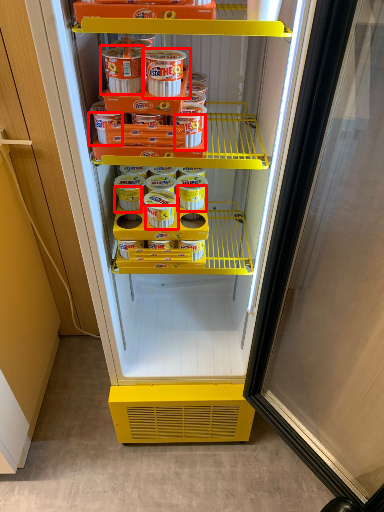

In [ ]:
import cv2
import numpy as np
import glob
import random
from google.colab.patches import cv2_imshow

#weights ='/content/gdrive/MyDrive/yolov3/yolov3_training_1000.weights'
weights ='/content/gdrive/MyDrive/yolov3/yolov3_training_last.weights'

cfg = '/content/gdrive/MyDrive/yolov3/yolov3_testing.cfg'
#dataset ='/content/gdrive/MyDrive/yolov3/pot0.jpg'

# Images path
img_path = '/content/gdrive/MyDrive/yolov3/input/images_orig/thumbnail_image002.jpg'

# Load Yolo
net = cv2.dnn.readNet(weights, cfg)

# Name custom object
classes = ["pot"]

layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))


img = cv2.imread(img_path)
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

net.setInput(blob)
outs = net.forward(output_layers)

# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.3:
            # Object detected
            #print(class_id)
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
print(indexes)
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[class_ids[i]]
        cv2.rectangle(img, (x, y), (x + w, y + h), (0,0,255), 2)
        #cv2.putText(img, label, (x, y + 30), font, 3, color, 1)

print("no. of bounding boxes",len(indexes))
cv2.imwrite("/content/gdrive/MyDrive/yolov3/output/test2_thumbnail_image002.jpg", img)
cv2_imshow(img)
